In [131]:
import os, sys
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [132]:
# load all the .csv files within one folder
# return -> dict: {key=csv filename, value=pd.DataFrame}
def load_all_files(path):
    d = {}
    for root, dirs, files in os.walk(path):
        for file in files:
            d[file.split(".")[0]] = pd.read_csv(os.path.join(root, file), index_col=0)
    return d

In [133]:
data_dict = load_all_files("./preprocessed_data_Barry")

In [134]:
data_dict.keys()

dict_keys(['C1_School_closing', 'C2_Workplace_closing', 'C3_Cancel_public_events', 'C4_Restrictions_on_gatherings', 'C5_Close_public_transport', 'C6_Stay_at_home_requirements', 'C7_Restrictions_on_internal_movement', 'C8_International_travel_controls', 'ConfirmedCases', 'ConfirmedDeaths', 'E1_Income_support', 'E2_Debt_contract_relief', 'E3_Fiscal_measures', 'E4_International_support', 'H1_Public_information_campaigns', 'H2_Testing_policy', 'H3_Contact_tracing', 'H4_Emergency_investment_in_healthcare', 'H5_Investment_in_vaccines', 'H6_Facial_Coverings', 'I_ContainmentHealthIndex', 'I_GovernmentResponseIndex', 'I_StringencyIndex', 'I_StringencyLegacyIndex'])

In [145]:
# select features & country data to be included into the model
selected_features = ['C1_School_closing', 'C2_Workplace_closing', 'C3_Cancel_public_events', 'C4_Restrictions_on_gatherings',
                     'C5_Close_public_transport', 'C6_Stay_at_home_requirements', 'C7_Restrictions_on_internal_movement', 
                     'C8_International_travel_controls', 'E1_Income_support', 'E2_Debt_contract_relief', 
                     'E3_Fiscal_measures', 'E4_International_support', 'H1_Public_information_campaigns', 'H2_Testing_policy', 'H3_Contact_tracing',
                     'H4_Emergency_investment_in_healthcare', 'H5_Investment_in_vaccines', 'H6_Facial_Coverings', 'I_ContainmentHealthIndex', 
                     'I_GovernmentResponseIndex', 'I_StringencyIndex', 'ConfirmedCases']
selected_country = ["ITA", "JPN", "USA"]

In [136]:
# create a date * feature sample dataframe
dates = data_dict["ConfirmedCases"].columns[1:]
sample_df = pd.DataFrame(columns=selected_features, index=dates, dtype=float)

In [137]:
# sample_df

In [147]:
def do_regression(country, concat_df, scale=True):
    # insert corresponding feature data from dataframes
    for feature in selected_features:
        concat_df[feature] = data_dict[feature].loc[country]
            
     # clear out invalid tail data       
    concat_df = concat_df.iloc[:-10,:].copy()
    
    # insert "YesterdayConfirmed" feature
    concat_df = insert_yesterday(concat_df).copy()
    
    # replace NaN with 0
    concat_df = concat_df.fillna(0)
    
    # create train&test data
    X = np.array(concat_df[selected_features[:-1]+ ["YesterdayConfirmed"]])
    y = np.array(concat_df[selected_features[-1]]).reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    # X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)
    
    # whether to scale the data, True by default
    if scale:
        scaler_x = StandardScaler()
        X_train = scaler_x.fit_transform(X_train)
        X_test  = scaler_x.transform(X_test)
        X_train = np.hstack((np.ones(X_train.shape[0]).reshape(-1,1), X_train))
        X_test = np.hstack((np.ones(X_test.shape[0]).reshape(-1,1), X_test))

        scaler_y = StandardScaler()
        y_train = scaler_y.fit_transform(y_train)
        y_test  = scaler_y.transform(y_test)
    
    # create linear regression model & train
    regr = linear_model.LinearRegression(normalize=True)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    # print out statistical data
    print("--------------------------------------------------")
    print("Country:", country)
    print('Coefficients: \n')
    for i in range(0, len(regr.coef_[0]) -1):
        print("Feature: %s" % selected_features[i])
        print("Weight: %.6f" % regr.coef_[0][i + 1])
        print()
    print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
    print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
    
    plt.semilogy(y_pred, label = "y_pred");
    plt.semilogy(y_test, label = "y_test");

    plt.show()

In [139]:
def insert_yesterday(df):
    yesterday = [0]
    yesterday.extend(list(df["ConfirmedCases"]))
    df["YesterdayConfirmed"] =yesterday[:-1]
    return df

--------------------------------------------------
Country: ITA
Coefficients: 

Feature: C1_School_closing
Weight: -0.017695

Feature: C2_Workplace_closing
Weight: -0.004668

Feature: C3_Cancel_public_events
Weight: 0.004202

Feature: C4_Restrictions_on_gatherings
Weight: -0.007034

Feature: C5_Close_public_transport
Weight: -0.006408

Feature: C6_Stay_at_home_requirements
Weight: -0.012474

Feature: C7_Restrictions_on_internal_movement
Weight: -0.010154

Feature: C8_International_travel_controls
Weight: -0.005342

Feature: E1_Income_support
Weight: 0.008602

Feature: E2_Debt_contract_relief
Weight: -0.017241

Feature: E3_Fiscal_measures
Weight: 0.000438

Feature: E4_International_support
Weight: 0.000000

Feature: H1_Public_information_campaigns
Weight: -0.017312

Feature: H2_Testing_policy
Weight: -0.018706

Feature: H3_Contact_tracing
Weight: -0.017312

Feature: H4_Emergency_investment_in_healthcare
Weight: 0.000429

Feature: H5_Investment_in_vaccines
Weight: 0.000168

Feature: H6_F

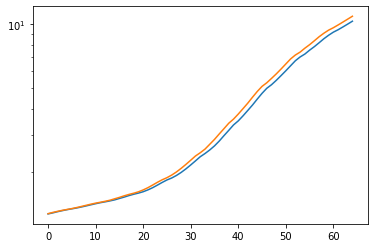

--------------------------------------------------
Country: JPN
Coefficients: 

Feature: C1_School_closing
Weight: -0.002106

Feature: C2_Workplace_closing
Weight: 0.005841

Feature: C3_Cancel_public_events
Weight: 0.001797

Feature: C4_Restrictions_on_gatherings
Weight: 0.000000

Feature: C5_Close_public_transport
Weight: -0.000000

Feature: C6_Stay_at_home_requirements
Weight: 0.010987

Feature: C7_Restrictions_on_internal_movement
Weight: 0.001839

Feature: C8_International_travel_controls
Weight: 0.002372

Feature: E1_Income_support
Weight: -1.117598

Feature: E2_Debt_contract_relief
Weight: -2.044379

Feature: E3_Fiscal_measures
Weight: -0.001021

Feature: E4_International_support
Weight: 0.000421

Feature: H1_Public_information_campaigns
Weight: 0.003679

Feature: H2_Testing_policy
Weight: -1.302669

Feature: H3_Contact_tracing
Weight: -0.767226

Feature: H4_Emergency_investment_in_healthcare
Weight: 0.000373

Feature: H5_Investment_in_vaccines
Weight: 0.000177

Feature: H6_Facia

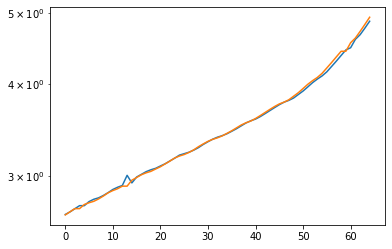

--------------------------------------------------
Country: USA
Coefficients: 

Feature: C1_School_closing
Weight: 0.009378

Feature: C2_Workplace_closing
Weight: -0.003067

Feature: C3_Cancel_public_events
Weight: 0.005594

Feature: C4_Restrictions_on_gatherings
Weight: 0.016157

Feature: C5_Close_public_transport
Weight: 0.004601

Feature: C6_Stay_at_home_requirements
Weight: -0.002193

Feature: C7_Restrictions_on_internal_movement
Weight: 0.024124

Feature: C8_International_travel_controls
Weight: 0.006421

Feature: E1_Income_support
Weight: 0.256359

Feature: E2_Debt_contract_relief
Weight: 0.256359

Feature: E3_Fiscal_measures
Weight: 0.001229

Feature: E4_International_support
Weight: -0.000005

Feature: H1_Public_information_campaigns
Weight: 0.013347

Feature: H2_Testing_policy
Weight: -0.039555

Feature: H3_Contact_tracing
Weight: -0.012018

Feature: H4_Emergency_investment_in_healthcare
Weight: -0.001138

Feature: H5_Investment_in_vaccines
Weight: 0.000309

Feature: H6_Facial

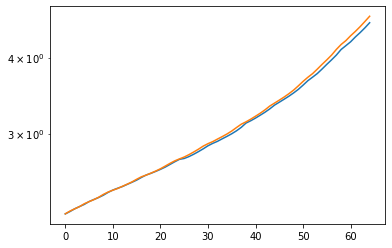

In [148]:
for country in selected_country:
    do_regression(country, sample_df)